In [1]:
import json
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

### 30 minutes agg.

In [2]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='hauptluftung_30T', 
    freq=30,
    normalize_time=True
    )

In [3]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.06, 0.10) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

### Create, Train, and Perform Inference

Iter 1 , Loss = 0.9911878370949139 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.9540530740063972 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.9183054006809589 , Noise = 0.5982235670089722
Iter 4 , Loss = 0.8842678950682537 , Noise = 0.5544093251228333
Iter 5 , Loss = 0.850606251316124 , Noise = 0.5130317807197571
Iter 6 , Loss = 0.8177751429759027 , Noise = 0.47405683994293213
Iter 7 , Loss = 0.786233624744129 , Noise = 0.43744340538978577
Iter 8 , Loss = 0.7560440360312382 , Noise = 0.4031459391117096
Iter 9 , Loss = 0.7274109774947778 , Noise = 0.37111231684684753
Iter 10 , Loss = 0.700677432130309 , Noise = 0.3412841260433197
Iter 11 , Loss = 0.6755467008457928 , Noise = 0.3135998547077179
Iter 12 , Loss = 0.6516118609848444 , Noise = 0.2879939079284668
Iter 13 , Loss = 0.6291153986567485 , Noise = 0.26439473032951355
Iter 14 , Loss = 0.6083988677169044 , Noise = 0.24272754788398743
Iter 15 , Loss = 0.5896462462280726 , Noise = 0.22291703522205353
Iter 16 , Loss = 0.572960356653

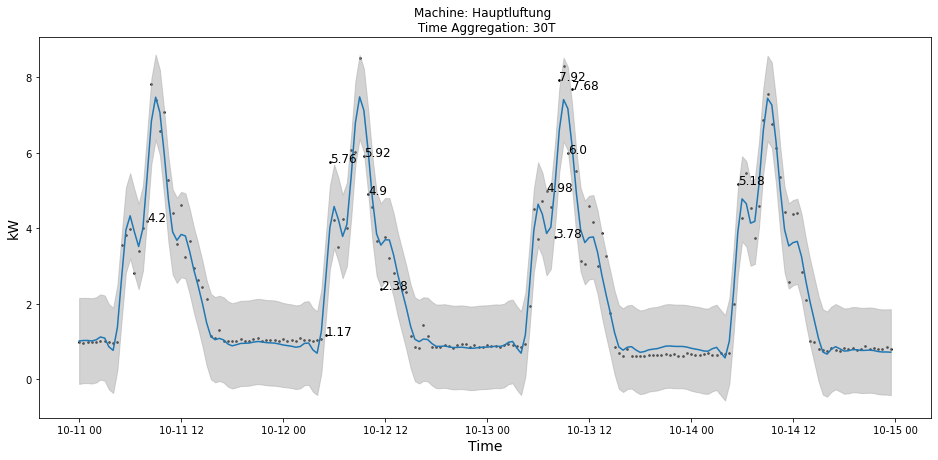

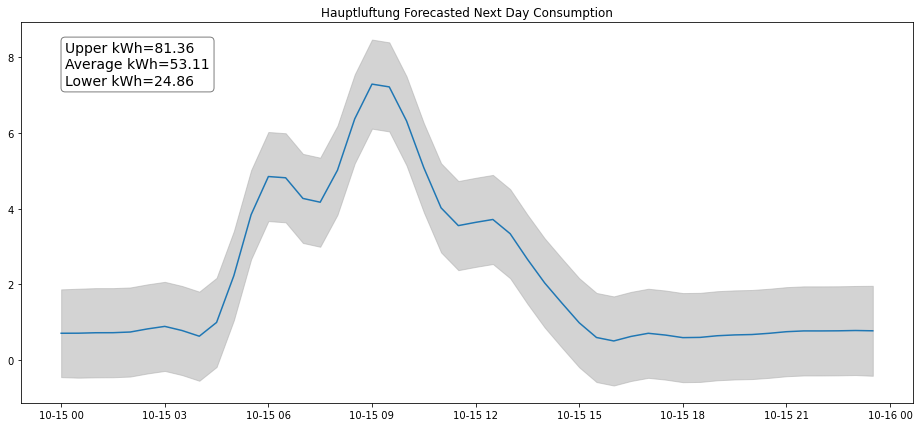

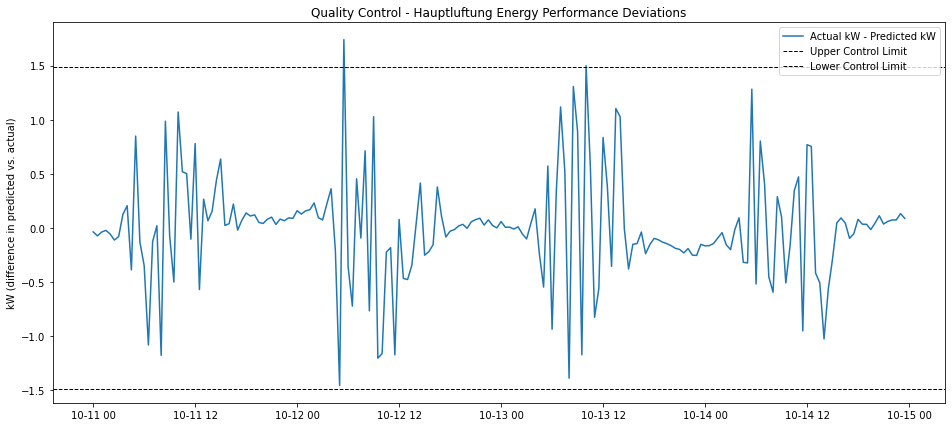

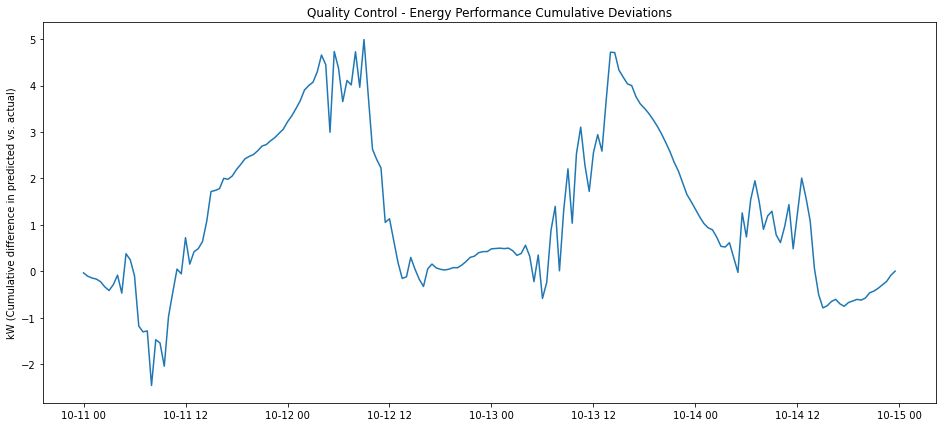

Hauptluftung
-----------------------------------
Expected next day energy consumption    =  53.11091141948144 kWh
Upper bound next day energy consumption =  81.35823400339918 kWh
Lower bound next day energy consumption =  24.863588835563682 kWh


Abnormal High Energy Consumption
---------------------------------
2021-10-12 05:30:00 5.761022398848489
2021-10-13 07:00:00 4.981170777994485
2021-10-13 08:30:00 7.917093461150381
2021-10-13 10:00:00 7.676323134249586
2021-10-14 05:30:00 5.177285566245639


Abnormal Low Energy Consumption
---------------------------------
2021-10-11 08:00:00 4.2044771133708005
2021-10-12 05:00:00 1.1747301164770516
2021-10-12 09:30:00 5.92210299823524
2021-10-12 10:00:00 4.899049882105381
2021-10-12 11:30:00 2.383818251749335
2021-10-13 08:00:00 3.7793593335654982
2021-10-13 09:30:00 5.999446291877582


In [4]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    training_iter=50,
    lr=0.1,
    time_agg='30T',
    machine='Hauptluftung',
    update_score=False
)

In [ ]:
for time, val in perf_dev_upper.items():
    print(time, val)

In [ ]:
mse, mape

### 10 minutes agg.

In [5]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    machine='hauptluftung_10T', 
    freq=10,
    normalize_time=True
    )

In [6]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.06, 0.09) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.18, 0.21) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation

Iter 1 , Loss = 0.9305457704904975 , Noise = 0.6932471990585327
Iter 2 , Loss = 0.8982200608931232 , Noise = 0.6444966793060303
Iter 3 , Loss = 0.8686695125993962 , Noise = 0.5982322692871094
Iter 4 , Loss = 0.8395713843859638 , Noise = 0.5544449687004089
Iter 5 , Loss = 0.8101833842269011 , Noise = 0.5131147503852844
Iter 6 , Loss = 0.7811706295668792 , Noise = 0.4742059111595154
Iter 7 , Loss = 0.7535498854000848 , Noise = 0.4376721978187561
Iter 8 , Loss = 0.7265317391777383 , Noise = 0.4034651219844818
Iter 9 , Loss = 0.6993166585623584 , Noise = 0.37152624130249023
Iter 10 , Loss = 0.6721398976554163 , Noise = 0.34178194403648376
Iter 11 , Loss = 0.6451031411757947 , Noise = 0.31414923071861267
Iter 12 , Loss = 0.6176584525543167 , Noise = 0.2885405421257019
Iter 13 , Loss = 0.5894349412065569 , Noise = 0.2648627460002899
Iter 14 , Loss = 0.5613086525846545 , Noise = 0.24301718175411224
Iter 15 , Loss = 0.5349916607964202 , Noise = 0.22290880978107452
Iter 16 , Loss = 0.5111470072

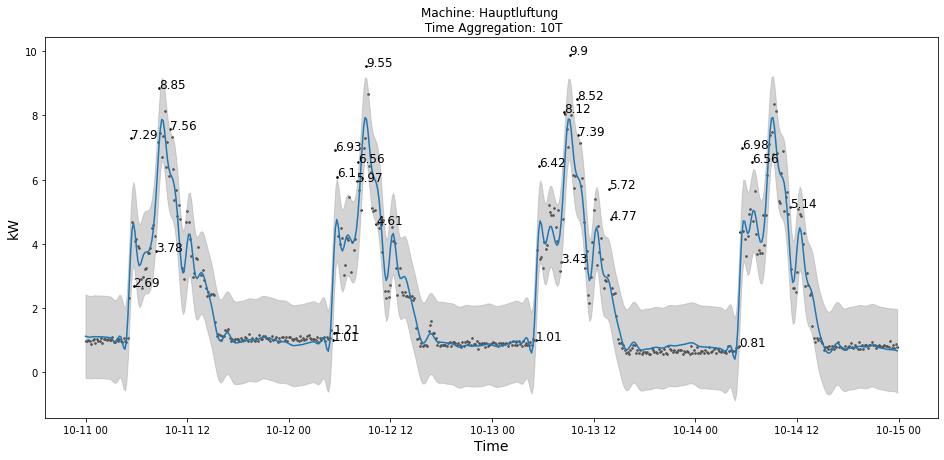

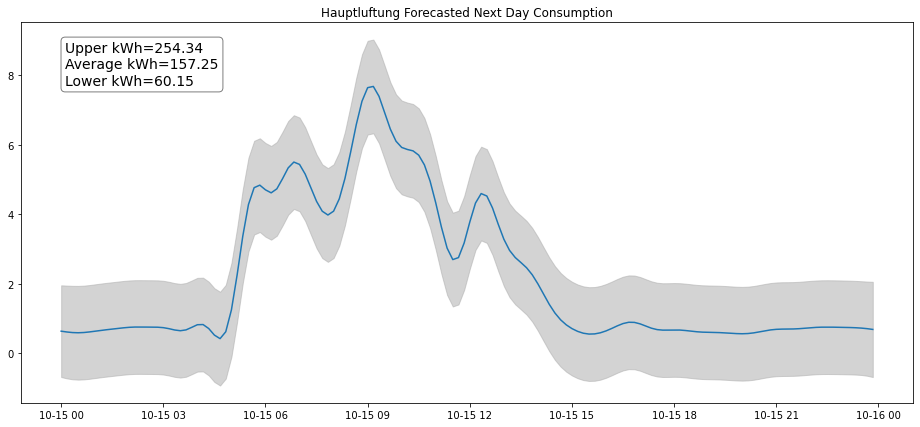

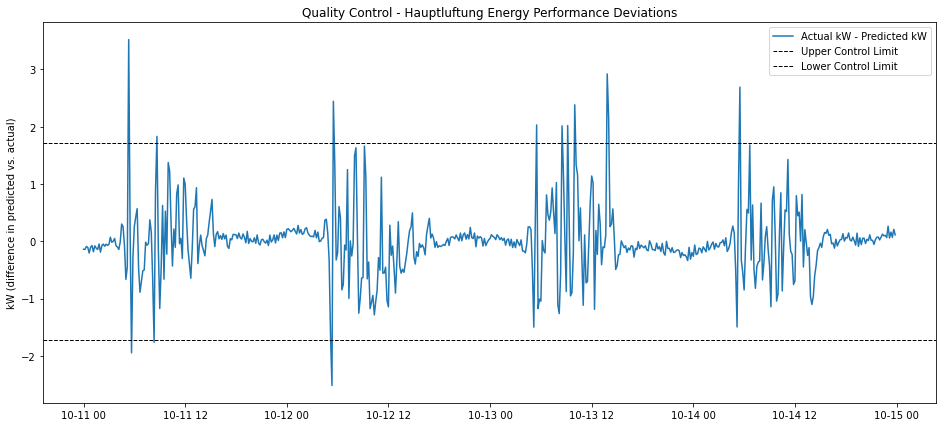

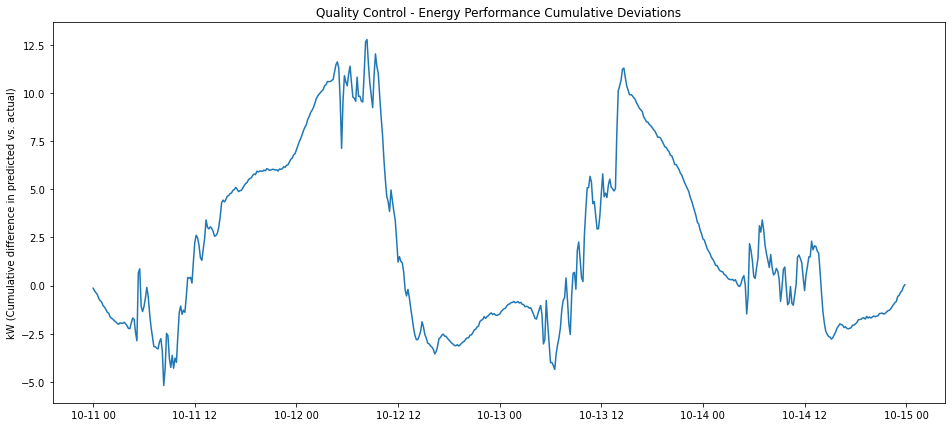

Hauptluftung
-----------------------------------
Expected next day energy consumption    =  157.24689771061838 kWh
Upper bound next day energy consumption =  254.3426287045141 kWh
Lower bound next day energy consumption =  60.151166716722685 kWh


Abnormal High Energy Consumption
---------------------------------
2021-10-11 05:20:00 7.29242127855982
2021-10-11 08:40:00 8.84759211567755
2021-10-11 10:00:00 7.563449608116267
2021-10-12 05:30:00 6.934213400566465
2021-10-12 05:40:00 6.095499583217217
2021-10-12 08:00:00 5.968513753401125
2021-10-12 08:10:00 6.559395193395616
2021-10-12 09:10:00 9.548047816641157
2021-10-13 05:30:00 6.419778372150226
2021-10-13 08:30:00 8.11774958419241
2021-10-13 09:10:00 9.897363246469697
2021-10-13 10:00:00 8.515290695732896
2021-10-13 10:10:00 7.385924722988319
2021-10-13 13:50:00 5.722230392208735
2021-10-13 14:00:00 4.77131391563357
2021-10-14 05:30:00 6.984107538479385
2021-10-14 06:40:00 6.5595959900143335
2021-10-14 11:10:00 5.142990488576195


Ab

In [7]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    training_iter=100,
    lr=0.1,
    time_agg='10T',
    machine='Hauptluftung',
    update_score=False
)

In [5]:
mse, mape

(MultivariateNormal(loc: torch.Size([720])), 0.5600183758746294)